In [1]:
# 设置cell宽度
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 警告
import warnings
warnings.filterwarnings('ignore')

# matplotlib
from tqdm import tqdm
from pprint import pprint
from matplotlib import pylab
from seaborn import set_style
set_style("darkgrid")
%matplotlib inline

# matplotlib 中文乱码、正负号乱码
from platform import system
os_name = system()
print(os_name)

from matplotlib import rcParams
rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
if os_name == r"Windows":
    rcParams["font.sans-serif"]=["SimHei"] #设置字体
elif os_name == r"Darwin":
    rcParams['font.family'] = 'PingFang HK'
else:
    pass


# 调整运行根目录
import os
# os.chdir(os.path.abspath(os.path.dirname(os.getcwd())))
# os.chdir(os.path.abspath(os.path.dirname(os.getcwd())))
#os.chdir(os.path.abspath(os.path.dirname(os.getcwd())))
print(os.getcwd()) 

# Dataframe显示格式
from pandas import set_option
set_option('display.max_info_rows',1000)
set_option('display.max_rows',1000)
set_option('display.max_columns',1000)
set_option('display.max_colwidth',1000)
set_option('display.float_format',lambda x : '%.4f' % x)

Windows
D:\github\xueqiu\Date20221229 中证消费指数分析


In [2]:
from pandas import read_csv, read_excel, concat
from os import getcwd, sep
from matplotlib import pyplot
import re

In [3]:
def get_weight_from_zz(index_symbol: str):
    """
    中证指数

    :param index_symbol:
    :return:
    """
    weight = getcwd() + sep + r"data" + sep + r"{}closeweight.xls".format(index_symbol)
    weight = read_excel(io=weight, dtype=str)
    weight.columns = [''.join(re.findall(re.compile(u'[\u4e00-\u9fa5]'), i)) for i in weight.columns]
    weight["权重"] = weight["权重"].astype(float)
    weight.sort_values("权重", inplace=True, ascending=False)
    weight = weight.set_index("成分券代码")
    weight.index.name = "symbol"
    return weight


def get_weight_from_gz(file_name: str):
    """
    国证指数
    :param file_name:
    :return:
    """
    weight = getcwd() + sep + r"data" + sep + r"{}.xls".format(file_name)
    weight = read_excel(io=weight, dtype=str)
    weight.columns = [''.join(re.findall(re.compile(u'[\u4e00-\u9fa5]'), i)) for i in weight.columns]
    weight["权重"] = weight["权重"].astype(float)
    weight.sort_values("权重", inplace=True, ascending=False)
    weight = weight.set_index("样本代码")
    weight.index.name = "symbol"
    return weight

In [4]:
weight = dict()
weight["中证全指"] = get_weight_from_zz("000985")

# 中证全指可选消费指数 (000989)
# 为反映中证全指指数样本中不同行业公司证券的整体表现，为投资者提供分析工具，将中证全指指数样本按中证行业分类分为11个一级行业、35个二级行业、90余个三级行业及200余个四级行业，再以进入各一、二、三、四级行业的全部证券作为样本编制指数，形成中证全指行业指数。
weight["中证全指可选消费指数"] = get_weight_from_zz("000989")

# 中证消费服务领先指数 (000806)
# 中证消费服务领先指数从沪深市场中选取涉及食品饮料、服装、文教体育、医药生物、金融保险、文化传播以及家庭用品等消费服务领域的100只上市公司证券作为指数样本，以反映沪深市场消费服务相关上市公司证券的整体表现。
weight["中证消费服务领先指数"] = get_weight_from_zz("000806")

# 中证消费驱动100指数 (931354)
# 中证消费驱动100指数从沪深市场的行业中选取较具代表性的100只上市公司证券作为指数样本，以反映沪深市场消费行业上市公司证券的整体表现。
weight["中证消费驱动100指数"] = get_weight_from_zz("931354")

Text(0.5, 1.0, '中证消费驱动100指数, Date:20221130')

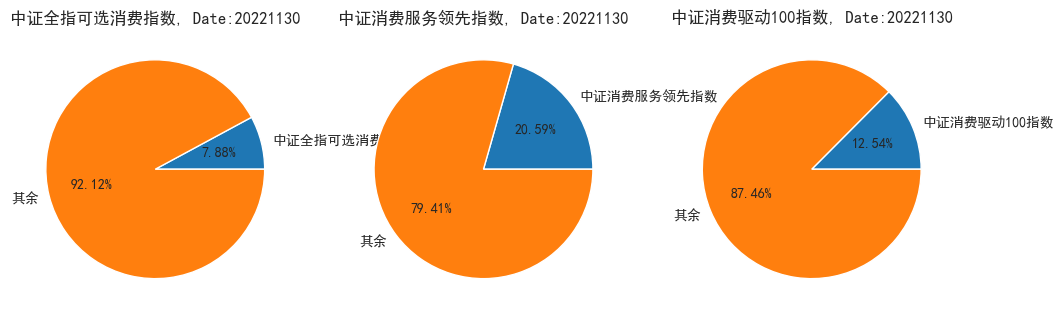

In [5]:
fig = pyplot.figure(figsize=(12, 12))

ax = fig.add_subplot(131)
index_name = "中证全指可选消费指数"
w = weight["中证全指"].loc[weight[index_name].index]["权重"].sum() / weight["中证全指"]["权重"].sum()
w = [w, 1-w]
label = [index_name, "其余"]
ax.pie(w,labels=label,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
ax.set_title("{}, Date:{}".format(index_name, weight["中证全指"]["日期"].iloc[0]))

ax = fig.add_subplot(132)
index_name = "中证消费服务领先指数"
w = weight["中证全指"].loc[weight[index_name].index]["权重"].sum() / weight["中证全指"]["权重"].sum()
w = [w, 1-w]
label = [index_name, "其余"]
ax.pie(w,labels=label,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
ax.set_title("{}, Date:{}".format(index_name, weight["中证全指"]["日期"].iloc[0]))

ax = fig.add_subplot(133)
index_name = "中证消费驱动100指数"
w = weight["中证全指"].loc[weight[index_name].index]["权重"].sum() / weight["中证全指"]["权重"].sum()
w = [w, 1-w]
label = [index_name, "其余"]
ax.pie(w,labels=label,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
ax.set_title("{}, Date:{}".format(index_name, weight["中证全指"]["日期"].iloc[0]))

In [6]:
def get_k_data_from_zz(index_symbol: str):
    """
    中证指数

    :param index_symbol:
    :return:
    """
    weight = getcwd() + sep + r"data" + sep + r"{}perf.xlsx".format(index_symbol)
    weight = read_excel(io=weight, dtype=str)
    weight.columns = [''.join(re.findall(re.compile(u'[\u4e00-\u9fa5]'), i)) for i in weight.columns]
    weight.loc[:, ["开盘", "最高", "最低", "收盘"]] = weight.loc[:, ["开盘", "最高", "最低", "收盘"]].astype(float)
    weight["成交量"] = (weight["成交量万手"].astype("float64") * 10000).astype("int64")
    weight = weight.sort_values("日期").reset_index(drop=True)
    return weight

def get_k_data_from_gz(index_symbol: str):
    """
    国证指数

    :param index_symbol:
    :return:
    """
    weight = listdir(getcwd() + sep + r"data")
    weight = [i for i in weight if index_symbol in i and "_perf_" in i]
    weight = weight[0]
    weight = getcwd() + sep + r"data" + sep + weight
    weight = read_excel(io=weight, dtype=str)
    weight.columns = [''.join(re.findall(re.compile(u'[\u4e00-\u9fa5]'), i)) for i in weight.columns]
    weight.loc[:, ["开盘价", "最高价", "最低价", "收盘价"]] = weight.loc[:, ["开盘价", "最高价", "最低价", "收盘价"]].astype(float)
    weight["成交量"] = (weight["成交量万手"].astype("float64") * 10000).astype("int64")
    weight = weight.sort_values("日期").reset_index(drop=True)
    return weight

In [ ]:
k_data = dict()
k_data["中证全指"] = get_k_data_from_zz("000985").drop_duplicates(subset="日期", keep="last").reset_index(drop=True)

# 中证全指可选消费指数 (000989)
# 为反映中证全指指数样本中不同行业公司证券的整体表现，为投资者提供分析工具，将中证全指指数样本按中证行业分类分为11个一级行业、35个二级行业、90余个三级行业及200余个四级行业，
# 再以进入各一、二、三、四级行业的全部证券作为样本编制指数，形成中证全指行业指数。
k_data["中证全指可选消费指数"] = get_k_data_from_zz("000989").drop_duplicates(subset="日期", keep="last").reset_index(drop=True)

# 中证消费服务领先指数 (000806)
# 中证消费服务领先指数从沪深市场中选取涉及食品饮料、服装、文教体育、医药生物、金融保险、文化传播以及家庭用品等消费服务领域的100只上市公司证券作为指数样本，以反映沪深市场消费服务相关上市公司证券的整体表现。
k_data["中证消费服务领先指数"] = get_k_data_from_zz("000806").drop_duplicates(subset="日期", keep="last").reset_index(drop=True)

# 中证消费驱动100指数 (931354)
# 中证消费驱动100指数从沪深市场的行业中选取较具代表性的100只上市公司证券作为指数样本，以反映沪深市场消费行业上市公司证券的整体表现。
k_data["中证消费驱动100指数"] = get_k_data_from_zz("931354").drop_duplicates(subset="日期", keep="last").reset_index(drop=True)

In [ ]:
idx_list = k_data["中证全指"]["日期"].unique().tolist()
idx_list.sort()
df = []
for key, value in k_data.items():
    ser = k_data[key].set_index("日期")["收盘"]
    ser.name = key
    df.append(ser.reindex(idx_list, method="bfill"))
df = concat(df, axis=1)
df = df.loc["20181231":]
df /= df.iloc[0]
df.plot(figsize=(16, 5))

In [ ]:
idx_list = k_data["中证全指"]["日期"].unique().tolist()
idx_list.sort()
df = []
for key, value in k_data.items():
    ser = k_data[key].set_index("日期")["收盘"]
    ser.name = key
    df.append(ser.reindex(idx_list, method="bfill"))
df = concat(df, axis=1)
df = df.loc["20201231":]
df /= df.iloc[0]
df.plot(figsize=(16, 5))

In [ ]:
idx_list = k_data["中证全指"]["日期"].unique().tolist()
idx_list.sort()
df = []
for key, value in k_data.items():
    ser = k_data[key].set_index("日期")["收盘"]
    ser.name = key
    df.append(ser.reindex(idx_list, method="bfill"))
df = concat(df, axis=1)
df = df.loc["20211231":]
df /= df.iloc[0]
df.plot(figsize=(16, 5))